In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

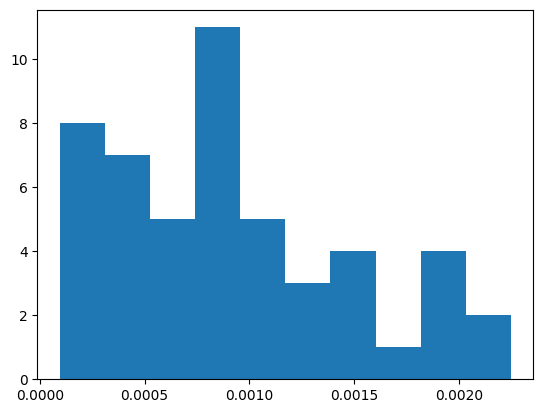

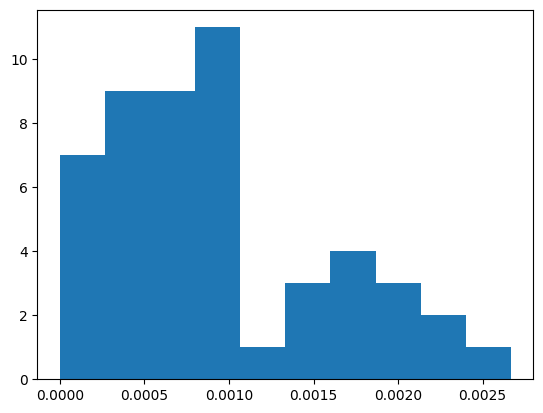

In [7]:
n_partidos = 50

population = np.concatenate((np.ones(n_partidos // 2, dtype=int) * 3000, np.ones(n_partidos - n_partidos // 2, dtype=int) * 1000000))

# print(population)

true_rates = np.random.beta(2, 1998, size=n_partidos)
plt.hist(true_rates)
plt.show()

cases = np.random.binomial(n=population, p=true_rates)

plt.hist(cases/population)
plt.show()

In [10]:
with pm.Model() as pooled_model:
    theta = pm.Beta('theta', alpha = 1, beta = 1)
    y_obs = pm.Binomial('y_obs', n = population, p = theta, observed = cases)
    pooled_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.


array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

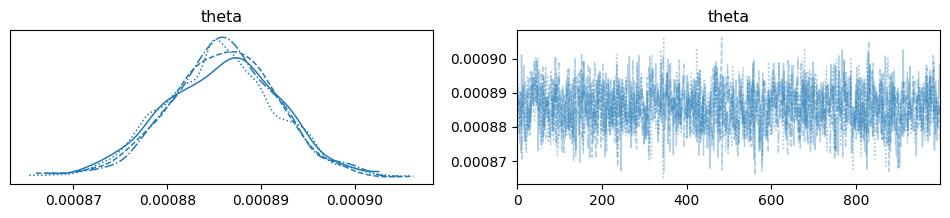

In [11]:
az.plot_trace(pooled_trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 103 seconds.


array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

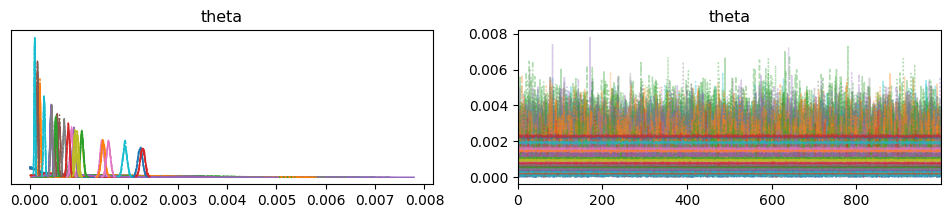

In [12]:
with pm.Model() as unpooled_model:
    theta = pm.Beta('theta', alpha = 1, beta = 1, shape = 50)
    y_obs = pm.Binomial('y_obs', n = population, p = theta, observed = cases)
    unpooled_trace = pm.sample()

az.plot_trace(unpooled_trace)

In [13]:
az.summary(unpooled_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta[0],0.001,0.001,0.000,0.003,0.0,0.0,4949.0,2597.0,1.0
theta[1],0.002,0.001,0.001,0.003,0.0,0.0,4297.0,2392.0,1.0
theta[2],0.002,0.001,0.001,0.004,0.0,0.0,5892.0,2480.0,1.0
theta[3],0.001,0.000,0.000,0.002,0.0,0.0,5402.0,2350.0,1.0
theta[4],0.001,0.001,0.000,0.002,0.0,0.0,5168.0,2366.0,1.0
theta[5],0.001,0.001,0.000,0.002,0.0,0.0,5350.0,2422.0,1.0
theta[6],0.001,0.001,0.000,0.003,0.0,0.0,5230.0,2664.0,1.0
theta[7],0.000,0.000,0.000,0.001,0.0,0.0,5057.0,2179.0,1.0
theta[8],0.002,0.001,0.000,0.003,0.0,0.0,6623.0,2921.0,1.0
theta[9],0.002,0.001,0.001,0.003,0.0,0.0,6371.0,2606.0,1.0


In [14]:
unpooled_mean = unpooled_trace.posterior['theta'].mean(dim = ["chain", "draw"])

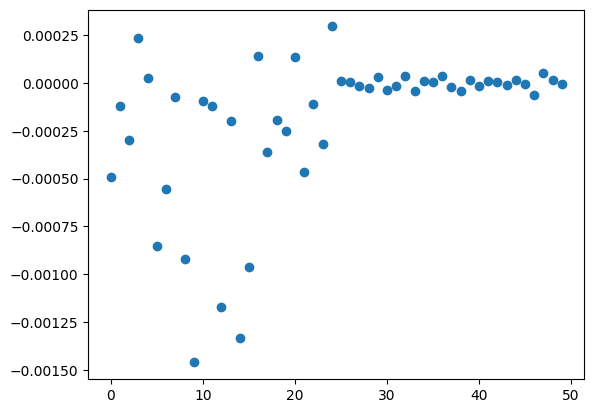

In [17]:
plt.plot(true_rates - unpooled_mean, "o")

yo espero que las diferencias mas grades entre mi estimacion y el valor posta, esten en los pueblos de menor cantidad de habitantes

CONSTRUYO MODELO JERARQUICO

In [20]:
with pm.Model() as modelo_jerarquico:
    alpha = pm.Gamma('alpha', 1,1)
    beta = pm.Gamma('beta', 1,1)
    theta = pm.Beta('theta', alpha = alpha, beta = beta, shape = 50)
    y_obs = pm.Binomial('y_obs', n = population, p = theta, observed = cases)
    trace_jerarquico = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 813 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

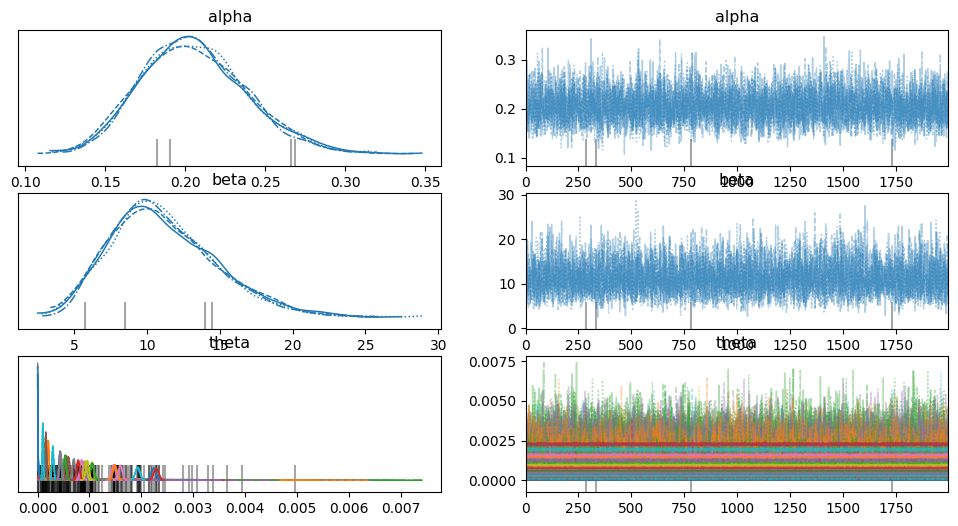

In [21]:
az.plot_trace(trace_jerarquico)

In [22]:
mean_jerarquica = trace_jerarquico.posterior['theta'].mean(dim = ["chain", "draw"])

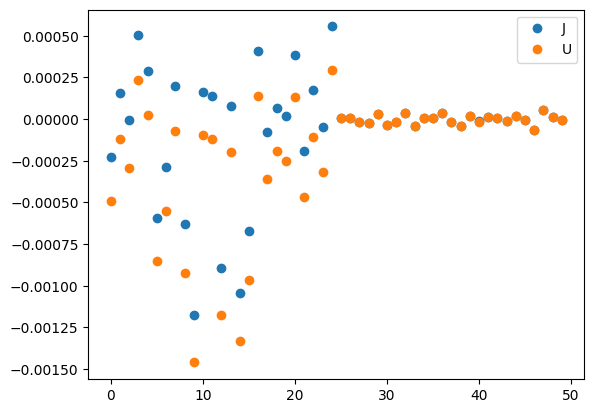

In [26]:
plt.plot(true_rates - mean_jerarquica, "o", label ="J")
plt.plot(true_rates - unpooled_mean, "o", label = "U")
plt.legend()
plt.show()